In [6]:
import glob
import pandas as pd

deployment_dirs = [
    "A001_SD001",
    "A002_SD013",
    "A003_SD005",
    "A004_SD012",
    "A005_SD002",
    "A006_SD006",
    "A007_SD017",
    "A008_SD007",
    "A009_SD009",
    "A010_SD014",
    "A011_SD018",
    "A013_SD016",
    "A014_SD021",
    "A015_SD010",
    "A016_SD022",
    "A017_SD024",
    "american_wigeon",
    "brant",
    "canada_goose",
    "eurasian_wigeon",
    "gadwall",
    "green_winged_teal",
    "mallard",
    "mute_swan",
    "northern_pintail",
    "red_breasted_merganser",
    "ring_necked_duck",
    "snow_goose",
    "trumpeter_swan",
    "wood_duck",
]

all_files = []
all_dfs = []
for deployment_dir in deployment_dirs:
    files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/*selections.txt")
    for file in files:
        df = pd.read_csv(file, sep="\t")
        #df.to_csv(file, sep="\t")
        all_dfs.append(df)
final_df = pd.concat(all_dfs)


In [12]:
import shutil 
deployment_dirs = [
    "A001_SD001",
    "A002_SD013",
    "A003_SD005",
    "A004_SD012",
    "A005_SD002",
    "A006_SD006",
    "A007_SD017",
    "A008_SD007",
    "A009_SD009",
    "A010_SD014",
    "A011_SD018",
    "A013_SD016",
    "A014_SD021",
    "A015_SD010",
    "A016_SD022",
    "A017_SD024",
    "american_wigeon",
    "brant",
    "canada_goose",
    "eurasian_wigeon",
    "gadwall",
    "green_winged_teal",
    "mallard",
    "mute_swan",
    "northern_pintail",
    "red_breasted_merganser",
    "ring_necked_duck",
    "snow_goose",
    "trumpeter_swan",
    "wood_duck",
]

all_files = []
all_dfs = []
for deployment_dir in deployment_dirs:
    files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/*selections.txt")
    for file in files:
        #print()
        file_stem = Path(file).stem.replace(".Table.1.selections", "")
        shutil.copy(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/{file_stem}.Table.1.selections.txt", f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment_dir}_{file_stem}.Table.1.selections.txt")

In [25]:
# Pull in hawk ears classes
hawk_ears_bird_classes_df = pd.read_csv("/Users/brettford/waterfowl_audio_id/hawk_ears_bird_classes.csv")
print(hawk_ears_bird_classes_df.head())

# Create dictionaries for study annotations to hawk ears labels/codes
annotations = [
    "branta_canadensis",
    "anas_platyrhynchos",
    "aix_sponsa",
    "anas_carolinensis",
    "cygnus_buccinator",
    "mareca_americana",
    "mergus_serrator",
    "mareca_strepera"
]

#annotation_dict = {
# "Green-winged Teal": "anas_carolinensis"
# "Canada Goose": "branta_canadensis",
# "Mallard": "anas_platyrhynchos",
# "Wood Duck": "aix_sponsa",
# "Trumpeter Swan": "cygnus_buccinator",
# "American Wigeon": "mareca_americana",
# "Gadwall": "mareca_strepera"
# }
# mergus_serrator not in there

hawk_ears_bird_classes_df[hawk_ears_bird_classes_df["common_name"].str.contains("lack")]



          common_name  code
0  Acadian Flycatcher  ACFL
1    Alder Flycatcher  ALFL
2     American Avocet  AMAV
3    American Bittern  AMBI
4       American Coot  AMCO


,common_name,code
32,Black Oystercatcher,BLOY
33,Black Tern,BLTE
34,Black Turnstone,BLTU
35,Black-and-white Warbler,BAWW
36,Black-backed Woodpecker,BBWO
37,Black-bellied Plover,BBPL
38,Black-billed Cuckoo,BBCU
39,Black-billed Magpie,BBMA
40,Black-capped Chickadee,BCCH
41,Black-crowned Night Heron,BCNH


In [28]:
# Spring species
# Dict of common name and frequency (out of ALL bird species)
spring_species_frequency = {
"Mallard": 25.61,
"Common Merganser": 16.49,
"Wood Duck": 12.89,
"Ring-necked Duck": 10.75,
"Bufflehead": 10.71,
"Hooded Merganser": 8.18,
"American Black Duck": 6.89,
"Common Goldeneye": 6.53,
"American Wigeon": 4.56,
"Green-winged Teal": 4.02,
"Trumpeter Swan": 3.27,
"Red-breasted Merganser": 3.24,
"Snow Goose": 3.15,
"Northern Pintail": 2.94,
"Gadwall": 2.59,
"Lesser Scaup": 1.75,
"Greater Scaup": 1.21,
"Redhead": 1.06,
#"Blue-winged Teal": 0.8533,
#"Mute Swan": 0.7356,
}

print("spring species not in model:")
for species in spring_species_frequency:
    # print(species)
    # print(species in hawk_ears_bird_classes_df["common_name"].tolist())
    if not species in hawk_ears_bird_classes_df["common_name"].tolist():
        print(species)


spring species not in model:
American Black Duck
Red-breasted Merganser
Lesser Scaup
Greater Scaup


In [29]:
# Spring species
# Dict of common name and frequency (out of ALL bird species)
summer_species_frequency = {
    "Canada Goose": 12.93,
    "Mallard": 11.57,
    "Wood Duck": 7.59,
    "American Black Duck": 1.79,
    "Common Merganser": 1.79,
    "Hooded Merganser": 1.34,
    "Ring-necked Duck": 1.25,
}

print("summer species not in model:")
for species in summer_species_frequency:
    # print(species)
    # print(species in hawk_ears_bird_classes_df["common_name"].tolist())
    if not species in hawk_ears_bird_classes_df["common_name"].tolist():
        print(species)

summer species not in model:
American Black Duck


In [8]:
import glob
from pathlib import Path
from pydub import AudioSegment

files = glob.glob("/Users/brettford/Downloads/american_black_duck_xeno_canto/*.mp3")
for file in files:
    file_stem = Path(file).stem
    sound = AudioSegment.from_mp3(file)
    sound.export(f"/Users/brettford/Downloads/american_black_duck_xeno_canto/{file_stem}.wav", format="wav")

In [14]:
import torch
torch.hub.list('kitzeslab/bioacoustics-model-zoo')

Using cache found in /Users/brettford/.cache/torch/hub/kitzeslab_bioacoustics-model-zoo_main


['BirdNET',
 'HawkEars',
 'MissingHawkearsDependency',
 'MissingTFDependency',
 'Perch',
 'SeparationModel',
 'YAMNet',
 'rana_sierrae_cnn']

In [32]:
import os
import pandas as pd
# Clean up data and get annotated files and annotations in one location
concat_df = pd.read_csv("/Users/brettford/Downloads/concatenated_eclipse_birdnet_results_df.csv")
concat_df.head()

deployment_dirs = [
    "american_wigeon",
    "canada_goose",
    "gadwall",
    "green_winged_teal",
    "mallard",
    "red_breasted_merganser",
    "trumpeter_swan",
    "wood_duck",
]

dir_name_to_birdnet_common_name = {
    "trumpeter_swan": "Trumpeter Swan",
    "american_wigeon": "American Wigeon",
    "canada_goose": "Canada Goose",
    "gadwall": "Gadwall",
    "green_winged_teal": "Green-winged Teal",
    "mallard": "Mallard",
    "red_breasted_merganser": "Red-breasted Merganser",
    "wood_duck": "Wood Duck",
}

for deployment_dir in deployment_dirs:
    common_name = dir_name_to_birdnet_common_name[deployment_dir]
    files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/*selections.txt")
    for file in files:
        file_stem = Path(file).stem.replace(".Table.1.selections", "")
        num_unique_file_names = len(concat_df[(concat_df["Common Name"]== common_name) & (concat_df["Begin Path"].str.contains(file_stem))]["Begin Path"].unique())
        # if num_unique_file_names == 1:
            # original_file_name = concat_df[(concat_df["Common Name"]== common_name) & (concat_df["Begin Path"].str.contains(file_stem))]["Begin Path"].unique()[0]
            # print(original_file_name)
            # path = os.path.normpath("/Volumes/LaCie/eclipse_2024/A010_SD014/20240408_063500.WAV")
            # deployment = path.split(os.sep)[4]
            
            # print(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment}_{file_stem}.wav")
            # shutil.copy(original_file_name, f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment}_{file_stem}.wav")
            # print(file)
            # print(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment}_{file_stem}.Table.1.selections.txt")
            # shutil.copy(file, f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment}_{file_stem}.Table.1.selections.txt")
        if num_unique_file_names > 1:
            print(deployment_dir)
            print(concat_df[(concat_df["Common Name"]== common_name) & (concat_df["Begin Path"].str.contains(file_stem))]["Begin Path"].unique())
            



canada_goose
['/Volumes/LaCie/eclipse_2024/A006_SD006/20240330_190500.WAV'
 '/Volumes/LaCie/eclipse_2024/A010_SD014/20240330_190500.WAV']
canada_goose
['/Volumes/LaCie/eclipse_2024/A006_SD006/20240331_065000.WAV'
 '/Volumes/LaCie/eclipse_2024/A015_SD010/20240331_065000.WAV']
mallard
['/Volumes/LaCie/eclipse_2024/A004_SD012/20240330_190700.WAV'
 '/Volumes/LaCie/eclipse_2024/A010_SD014/20240330_190700.WAV']


In [26]:
import os
path = os.path.normpath("/Volumes/LaCie/eclipse_2024/A010_SD014/20240408_063500.WAV")
path.split(os.sep)[4]

'A010_SD014'

In [36]:
files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
for file in files:
    df = pd.read_csv(file, sep="\t")
    print(df.columns.values)
    if 

['Unnamed: 0' 'Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'
 'Avg Power Density (dB FS/Hz)' 'Annotation']
['Unnamed: 0' 'Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'
 'Avg Power Density (dB FS/Hz)' 'Annotation']
['Unnamed: 0' 'Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'
 'Avg Power Density (dB FS/Hz)' 'Annotation']
['Unnamed: 0' 'Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'
 'Avg Power Density (dB FS/Hz)' 'Annotation']
['Unnamed: 0' 'Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'
 'Avg Power Density (dB FS/Hz)' 'Annotation']
['Unnamed: 0' 'Selection' 'View' 'Channel' 'Begin 

In [44]:
deployment_dirs = [
    "A001_SD001",
    "A002_SD013",
    "A003_SD005",
    "A004_SD012",
    "A005_SD002",
    "A006_SD006",
    "A007_SD017",
    "A008_SD007",
    "A009_SD009",
    "A010_SD014",
    "A011_SD018",
    "A013_SD016",
    "A014_SD021",
    "A015_SD010",
    "A016_SD022",
    "A017_SD024",]

for deployment_dir in deployment_dirs:
    files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/*selections.txt")
    for file in files:
        file_stem = Path(file).stem.replace(".Table.1.selections", "")
        print(f"/Volumes/LaCie/eclipse_2024/{deployment_dir}/{file_stem}.wav")
        print(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment_dir}_{file_stem}.wav")
        shutil.copy(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/{file_stem}.wav", f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment_dir}_{file_stem}.wav")
        #

/Volumes/LaCie/eclipse_2024/A001_SD001/20240411_055600.wav
/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240411_055600.wav
/Volumes/LaCie/eclipse_2024/A001_SD001/20240404_060600.wav
/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240404_060600.wav
/Volumes/LaCie/eclipse_2024/A001_SD001/20240403_054600.wav
/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240403_054600.wav
/Volumes/LaCie/eclipse_2024/A001_SD001/20240414_064800.wav
/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240414_064800.wav
/Volumes/LaCie/eclipse_2024/A001_SD001/20240412_061400.wav
/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240412_061400.wav
/Volumes/LaCie/eclipse_2024/A001_SD001/20240412_071100.wav
/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240412_071100.wav
/Volumes/LaCie/eclipse_2024/A001_SD001/20240414_070200.wav
/Volumes/LaCie/au

In [55]:
files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
for file in files:
    df = pd.read_csv(file)
    if "Annotation" in df.columns.values:
        df.rename(columns={"Annotation": "species"}, inplace=True)
    if "Unnamed: 0" in df.columns.values:
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
    print(df.columns.values)
    df.to_csv(file, index=False, sep="\t")

    #os.path.exists()

['Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'
 'Avg Power Density (dB FS/Hz)' 'species']
['Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'
 'Avg Power Density (dB FS/Hz)' 'species']
['Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'
 'Avg Power Density (dB FS/Hz)' 'species']
['Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'
 'Avg Power Density (dB FS/Hz)' 'species']
['Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'
 'Avg Power Density (dB FS/Hz)' 'species']
['Selection' 'View' 'Channel' 'Begin Time (s)' 'End Time (s)'
 'Low Freq (Hz)' 'High Freq (Hz)' 'Delta Time (s)' 'Delta Freq (Hz)'

In [ ]:
files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
for file in files:
    df = pd.read_csv(file)
    if "Annotation" in df.columns.values:
        df.rename(columns={"Annotation": "species"}, inplace=True)
    if "Unnamed: 0" in df.columns.values:
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
    print(df.columns.values)
    df.to_csv(file, index=False, sep="\t")
    

In [8]:
import glob
from pathlib import Path
files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
all_dfs = []
for file in files:
    df = pd.read_csv(file, sep="\t")
    df["deployment"] = file_stem[:10]
    #df.to_csv(file, sep="\t")
    all_dfs.append(df)
    file_stem = Path(file).stem.replace(".Table.1.selections", "")
    print()
final_df = pd.concat(all_dfs)
final_df

,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),species,deployment
0,1,Waveform 1,1,0.045987,0.908236,1958.159,3815.900,0.8622,1857.741,NaN,amphibian_chorus_more_in_file,A010_SD014
1,1,Spectrogram 1,1,0.045987,0.908236,1958.159,3815.900,0.8622,1857.741,-31.20,amphibian_chorus_more_in_file,A010_SD014
0,1,Waveform 1,1,0.057483,0.287416,4117.155,7933.054,0.2299,3815.900,NaN,empty,A001_SD001
1,1,Spectrogram 1,1,0.057483,0.287416,4117.155,7933.054,0.2299,3815.900,-74.96,empty,A001_SD001
0,1,Waveform 1,1,0.000000,0.839256,1857.741,3163.180,0.8393,1305.439,NaN,amphibian- more in file,A001_SD001
...,...,...,...,...,...,...,...,...,...,...,...,...
13,7,Spectrogram 1,1,52.102706,52.568321,444.400,2833.300,NaN,NaN,NaN,branta_canadensis,A010_SD014
14,8,Waveform 1,1,52.677539,52.953459,277.800,2555.600,NaN,NaN,NaN,branta_canadensis,A010_SD014
15,8,Spectrogram 1,1,52.677539,52.953459,277.800,2555.600,NaN,NaN,NaN,branta_canadensis,A010_SD014
16,9,Waveform 1,1,53.131657,53.557033,333.300,2833.300,NaN,NaN,NaN,branta_canadensis,A010_SD014


In [54]:
import seaborn as sns
spectrogram_df = final_df[(final_df["View"]=="Spectrogram 1") & (final_df["species"].isin(["branta_canadensis", "cygnus_buccinator", "anas_carolinensis", "anas_platyrhynchos", "aix_sponsa"]))]
spectrogram_df.groupby(["species", "deployment"]).size().to_frame('size').reset_index()

#df = sns.barplot(penguins, x="island", y="body_mass_g")

,species,deployment,size
0,aix_sponsa,A001_SD001,27
1,aix_sponsa,A010_SD014,56
2,anas_carolinensis,A010_SD014,65
3,anas_platyrhynchos,A006_SD006,19
4,anas_platyrhynchos,A010_SD014,72
5,branta_canadensis,A005_SD002,45
6,branta_canadensis,A006_SD006,25
7,branta_canadensis,A010_SD014,20
8,cygnus_buccinator,A005_SD002,3
9,cygnus_buccinator,A010_SD014,46


In [33]:
import os
#"/Volumes/LaCie/eclipse_2024/A010_SD014/20240408_063500.WAV"
birdnet_results_df = pd.read_csv("/Users/brettford/Downloads/concatenated_eclipse_birdnet_results_df.csv")
birdnet_results_df.head()
all_deployments = []
for i, row in birdnet_results_df.iterrows():
    path = os.path.normpath(row["Begin Path"])
    deployment = path.split(os.sep)[4]
    all_deployments.append(deployment)
birdnet_results_df["deployment"] = all_deployments
birdnet_results_df.head()
sample_size_df = birdnet_results_df.groupby(["deployment", "Common Name"]).size().to_frame('size').reset_index()
print(sample_size_df)
waterfowl_df = sample_size_df[sample_size_df["Common Name"].isin(["Canada Goose", "Trumpeter Swan", "Green-winged Teal", "Mallard", "Wood Duck"])]
waterfowl_df.sort_values(by=["deployment", "Common Name"], inplace=True)
print(waterfowl_df)
waterfowl_df.to_csv("/Users/brettford/Downloads/waterfowl_sample_size.csv", index=False)

     deployment                Common Name  size
0    A001_SD001           American Bittern     4
1    A001_SD001     American Golden-Plover     1
2    A001_SD001             American Robin    50
3    A001_SD001                 Bald Eagle     3
4    A001_SD001          Belted Kingfisher    10
..          ...                        ...   ...
672  A015_SD010                Winter Wren     5
673  A015_SD010                  Wood Duck    57
674  A015_SD010  Yellow-bellied Flycatcher     2
675  A015_SD010       Yellow-billed Cuckoo     1
676  A015_SD010                     nocall  2110

[677 rows x 3 columns]
     deployment        Common Name  size
20   A001_SD001          Wood Duck   400
47   A003_SD005     Trumpeter Swan     5
49   A003_SD005          Wood Duck     2
67   A004_SD012       Canada Goose    57
83   A004_SD012  Green-winged Teal    12
87   A004_SD012            Mallard   166
112  A004_SD012          Wood Duck   392
123  A005_SD002       Canada Goose    86
134  A005_SD002  Gr

/var/folders/rq/1dpzt_614v53ymfm0lqclqh80000gp/T/ipykernel_1782/4129909841.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waterfowl_df.sort_values(by=["deployment", "Common Name"], inplace=True)


In [ ]:
for file in df["file"]:
    path = os.path.normpath(file)
    
    shutil.copy(file, f"/Volumes/LaCie/audio_files_to_annotate/target_samples/{path.split(os.sep)[4]}_{path.split(os.sep)[5]}.wav"
    )

In [51]:
import glob
from pathlib import Path
files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
all_dfs = []
for file in files:
    #print(os.path.exists(file))
    wav_file = file.replace(".Table.1.selections.txt", ".wav")
    if not os.path.exists(wav_file):
        print(wav_file)
    #df.to_csv(file, sep="\t")
    # all_dfs.append(df)
    # file_stem = Path(file).stem.replace(".Table.1.selections", "")

In [45]:
print(wav_file)
# print(file)
# wav_file = file.replace(".Table.1.selections.txt", "")
# print(wav_file)

/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A006_SD006_20240331_191300.WAV


In [94]:
# This cell contains code to concatenate annotation labels and summarize number of annotations per deployment
import glob
import pandas as pd

# all_files = []
all_dfs = []

files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
for file in files:
    path = os.path.normpath(file)
    file_stem = deployment = path.split(os.sep)[5]
    deployment = file_stem[:10]
    df = pd.read_csv(file, sep="\t")
    df["deployment"] = deployment
    df["file_stem"] = file_stem
    all_dfs.append(df)
concatenated_annotations_df = pd.concat(all_dfs)
spectrogram_df = concatenated_annotations_df[(concatenated_annotations_df["View"]=="Spectrogram 1") & (concatenated_annotations_df["species"].isin(["branta_canadensis", "cygnus_buccinator", "anas_carolinensis", "anas_platyrhynchos", "aix_sponsa"]))]
spectrogram_df.groupby(["species", "deployment"]).size().to_frame('size').reset_index()


,species,deployment,size
0,aix_sponsa,A001_SD001,27
1,aix_sponsa,A005_SD002,2
2,aix_sponsa,A006_SD006,39
3,aix_sponsa,A010_SD014,56
4,anas_carolinensis,A006_SD006,1
5,anas_carolinensis,A010_SD014,65
6,anas_platyrhynchos,A005_SD002,10
7,anas_platyrhynchos,A006_SD006,43
8,anas_platyrhynchos,A010_SD014,91
9,branta_canadensis,A005_SD002,5


In [96]:
spectrogram_df.head()

,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),species,deployment,file_stem
5,3,Spectrogram 1,1,47.119327,47.684518,1480.653,9339.504,0.5652,7858.851,-76.43,aix_sponsa,A001_SD001,A001_SD001_20240414_064800.Table.1.selections.txt
5,3,Spectrogram 1,1,7.372883,7.852222,1907.765,6776.835,0.4793,4869.071,-66.33,aix_sponsa,A001_SD001,A001_SD001_20240414_070200.Table.1.selections.txt
9,5,Spectrogram 1,1,9.605030,10.019980,3075.203,7374.792,0.4150,4299.589,-70.84,aix_sponsa,A001_SD001,A001_SD001_20240414_070200.Table.1.selections.txt
11,6,Spectrogram 1,1,11.043047,11.708399,2932.832,7574.110,0.6654,4641.278,-63.36,aix_sponsa,A001_SD001,A001_SD001_20240414_070200.Table.1.selections.txt
19,10,Spectrogram 1,1,20.620942,21.193287,2875.884,6748.361,0.5723,3872.477,-60.34,aix_sponsa,A001_SD001,A001_SD001_20240414_070200.Table.1.selections.txt


In [151]:
import random

# This cell contains code that will be used to systematically go split data
all_deployment_names = ["A010_SD014",
"A005_SD002",
"A008_SD007",
"A016_SD022",
"A003_SD005",
"A017_SD024",
"A007_SD017",
"A009_SD009",
"A002_SD013",
"A002_SD013",
"A001_SD001",
"A014_SD021",
"A004_SD012",
"A011_SD018",
"A013_SD016",
"A006_SD006",
"A015_SD010",
"A018_SD011",
"A019_SD008",
"A021_SD023",
"A022_SD019"]
deployment_names_for_testing = ["A005_SD002", "A006_SD006"]

files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
print(len(files))
testing_files = []
train_validation_files = []
for file in files:
    if "A005_SD002" in file or "A006_SD006" in file:
            # print(file)
            # print(deployment_name)
        testing_files.append(file)
    else:
        train_validation_files.append(file)

print("Preview of testing files list:")
print(testing_files[:5])

print("Preview of training/validation/extra test files list:")
print(train_validation_files[:5])
print(len(set(train_validation_files)))
print(len(train_validation_files))

# Let's reserve a small proportion for additional testing files
number_of_additional_test_files_to_sample = round(0.1*len(train_validation_files))
print(f"Going to sample {number_of_additional_test_files_to_sample} additional test files")
additional_test_files = random.sample(train_validation_files, number_of_additional_test_files_to_sample)

print(f"Old sample size of train_validation files: {len(train_validation_files)}")
train_validation_files = [file for file in train_validation_files if file not in additional_test_files]
print(f"New sample size of train_validation files: {len(train_validation_files)}")


150
Preview of testing files list:
['/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A005_SD002_20240401_062800.Table.1.selections.txt', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A005_SD002_20240401_065600.Table.1.selections.txt', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A005_SD002_20240401_063000.Table.1.selections.txt', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A006_SD006_20240330_190500.Table.1.selections.txt', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A005_SD002_20240401_192300.Table.1.selections.txt']
Preview of training/validation/extra test files list:
['/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240411_055600.Table.1.selections.txt', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240404_060600.Table.1.selections.txt', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240403_05460

In [152]:
import numpy as np
from opensoundscape import BoxedAnnotations

np.random.seed = 11
random.seed = 11
# Let's first try to split randomly and see how many samples we have for each deployment site
# The file list I have is for the annotations because I globbed *selections.txt
# So, I have to create a list for the sound files
audio_file_paths = []
raven_file_paths = []
for file in train_validation_files:
    raven_file_paths.append(file)
    audio_file = file.replace(".Table.1.selections.txt", ".wav")
    audio_file_paths.append(audio_file)
print(audio_file_paths[:5])
print(raven_file_paths[:5])
for raven_file in raven_file_paths:
    if not os.path.exists(raven_file):
        print(f"WARNING!!! raven file {raven_file} doesn't exist")
for audio_file in audio_file_paths:
    if not os.path.exists(audio_file):
        print(f"WARNING!!! audio file {audio_file} doesn't exist")

['/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240411_055600.wav', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240404_060600.wav', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240414_064800.wav', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240412_061400.wav', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240414_070200.wav']
['/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240411_055600.Table.1.selections.txt', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240404_060600.Table.1.selections.txt', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240414_064800.Table.1.selections.txt', '/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/A001_SD001_20240412_061400.Table.1.selections.txt', '/Volumes/LaCie/audio_files_to_annotate/

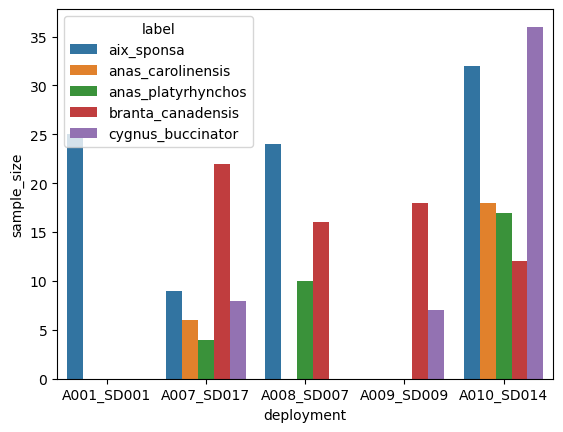

In [159]:
import numpy as np

np.random.seed = 11
random.seed = 11

# Let's define annotations class and split classes
all_annotations = BoxedAnnotations.from_raven_files(raven_files=raven_file_paths,audio_files=audio_file_paths, annotation_column="species")
#print(all_annotations.df)

# Let's split audio clips
class_list = ["branta_canadensis", "cygnus_buccinator", "anas_carolinensis", "anas_platyrhynchos", "aix_sponsa"]
labels = all_annotations.clip_labels(
  clip_duration=3,
  clip_overlap=0,
  min_label_overlap=0.25,
  class_subset=class_list
)
train_df, validation_df = train_test_split(labels, test_size=0.1)

# Let's check how many annotations we have for each species at each site
label_sample_size_dict = {}
species_by_deployment_dfs = []
for label in train_df.columns.values:
    label_df = train_df[train_df[label]]
    deployment_list = []
    for i, row in label_df.reset_index().iterrows():
        path = os.path.normpath(row["file"])
        deployment = path.split(os.sep)[5][:10]
        deployment_list.append(deployment)
    label_deployment_df = pd.DataFrame({"deployment":deployment_list})
    label_deployment_df["label"] = label
    species_by_deployment_dfs.append(label_deployment_df)
    # Group by deployment and species list and   
concatenated_species_by_deployment_sample_size_df = pd.concat(species_by_deployment_dfs)
species_by_deployment_sample_size_df = concatenated_species_by_deployment_sample_size_df.groupby(["deployment", "label"]).size().rename('sample_size').reset_index()
ax = sns.barplot(data=species_by_deployment_sample_size_df, x="deployment", y="sample_size", hue="label")
plt.savefig(
    f"/Users/brettford/Downloads/train_dataset_deployment_label_sample_sizes.png", bbox_inches="tight", dpi=800
)


#train_df[train_df["branta_canadensis"]]

In [158]:
# from sklearn.model_selection import train_test_split
# from opensoundscape import BoxedAnnotations, CNN

# all_annotations = BoxedAnnotations.from_raven_files(raven_files=raven_file_paths,audio_files=audio_file_paths)

TypeError: BoxedAnnotations.from_raven_files() missing 1 required positional argument: 'annotation_column'

In [160]:
# This cell contains code to plot histogram of box lengths
import matplotlib.pyplot as plt
import seaborn as sns

spectrogram_df.head()
spectrogram_df.columns.values
spectrogram_df["box_length"] = spectrogram_df["End Time (s)"] - spectrogram_df["Begin Time (s)"]
ax = sns.histplot(data=spectrogram_df, x=spectrogram_df["box_length"])

plt.savefig(
    f"/Users/brettford/Downloads/raven_waterfowl_box_lengths.png", bbox_inches="tight", dpi=800
)

plt.close()

print(spectrogram_df["box_length"].mean())

/var/folders/rq/1dpzt_614v53ymfm0lqclqh80000gp/T/ipykernel_1782/2982371150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectrogram_df["box_length"] = spectrogram_df["End Time (s)"] - spectrogram_df["Begin Time (s)"]


0.509034236631405


In [150]:
import pandas as pd
# Let's pull some files for annotating 
deployments = ["A009_SD009",
"A013_SD016"
"A014_SD021"
"A015_SD010"]

concat_df = pd.read_csv("/Users/brettford/Downloads/concatenated_eclipse_birdnet_results_df.csv")
# /Volumes/LaCie/eclipse_2024/A015_SD010/20240405_065100.WAV

deployments = []
for i, row in concat_df.iterrows():
    path = os.path.normpath(row["Begin Path"])
    deployment = path.split(os.sep)[4]
    deployments.append(deployment)
concat_df["deployment"] = deployments
concat_df.sort_values(['Common Name','deployment', 'Confidence'], inplace=True)
print(concat_df.head())
paths_to_copy = []
for common_name in ["Canada Goose", "Trumpeter Swan", "Green-winged Teal", "Mallard", "Wood Duck"]:
    for deployment in ["A009_SD009", "A010_SD014", "A013_SD016", "A014_SD021", "A015_SD010"]:
        df = concat_df[(concat_df["Common Name"] == common_name) & (concat_df["deployment"] == deployment)]
        #print(df.head())
        if not df.empty:
            print(df.sort_values(by="Confidence", ascending=False).reset_index())
            high_confidence_path = df.sort_values(by="Confidence", ascending=False).reset_index()["Begin Path"][0]
            print(high_confidence_path)
            paths_to_copy.append(high_confidence_path)
with open("/Users/brettford/Downloads/paths_to_target_annotating.csv", "w") as f:
    for elem in paths_to_copy:
        f.write(f"{elem}\n")
# Now just loop through, sort by Common Name, Deployment, and Confidence and Store first row


concat_df.head()

concat_df.to_csv("/Users/brettford/Downloads/concatenated_eclipse_birdnet_results_df_sorted.csv", index=False)
# for deployment in deployments:

     Unnamed: 0  Selection           View  Channel  Begin Time (s)  \
27            0          1  Spectrogram 1        1            30.0   
25            0          1  Spectrogram 1        1            15.0   
26            0          1  Spectrogram 1        1            21.0   
28            0          1  Spectrogram 1        1            48.0   
161           2          3  Spectrogram 1        1            42.0   

     End Time (s)  Low Freq (Hz)  High Freq (Hz)       Common Name  \
27           33.0              0           15000  American Bittern   
25           18.0              0           15000  American Bittern   
26           24.0              0           15000  American Bittern   
28           51.0              0           15000  American Bittern   
161          45.0              0           15000  American Bittern   

    Species Code  Confidence  \
27        amebit      0.6713   
25        amebit      0.6915   
26        amebit      0.7180   
28        amebit      0.7586  

In [149]:
import os
import shutil
for file in paths_to_copy:
    path = os.path.normpath(file)
    shutil.copy(file, f"/Volumes/LaCie/audio_files_to_annotate/target_samples/{path.split(os.sep)[4]}_{path.split(os.sep)[5]}"
    )